In [5]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
from classes.descriptors import PairDistances, CoordinationNumbers, ConnectivityGraphSpectrum, CoulombMatrixSpectrum
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [6]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos, size=20) for pos in poses]) for poses in positions]
descriptor_types = [PairDistances(), CoordinationNumbers(), ConnectivityGraphSpectrum(), CoulombMatrixSpectrum()]

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]


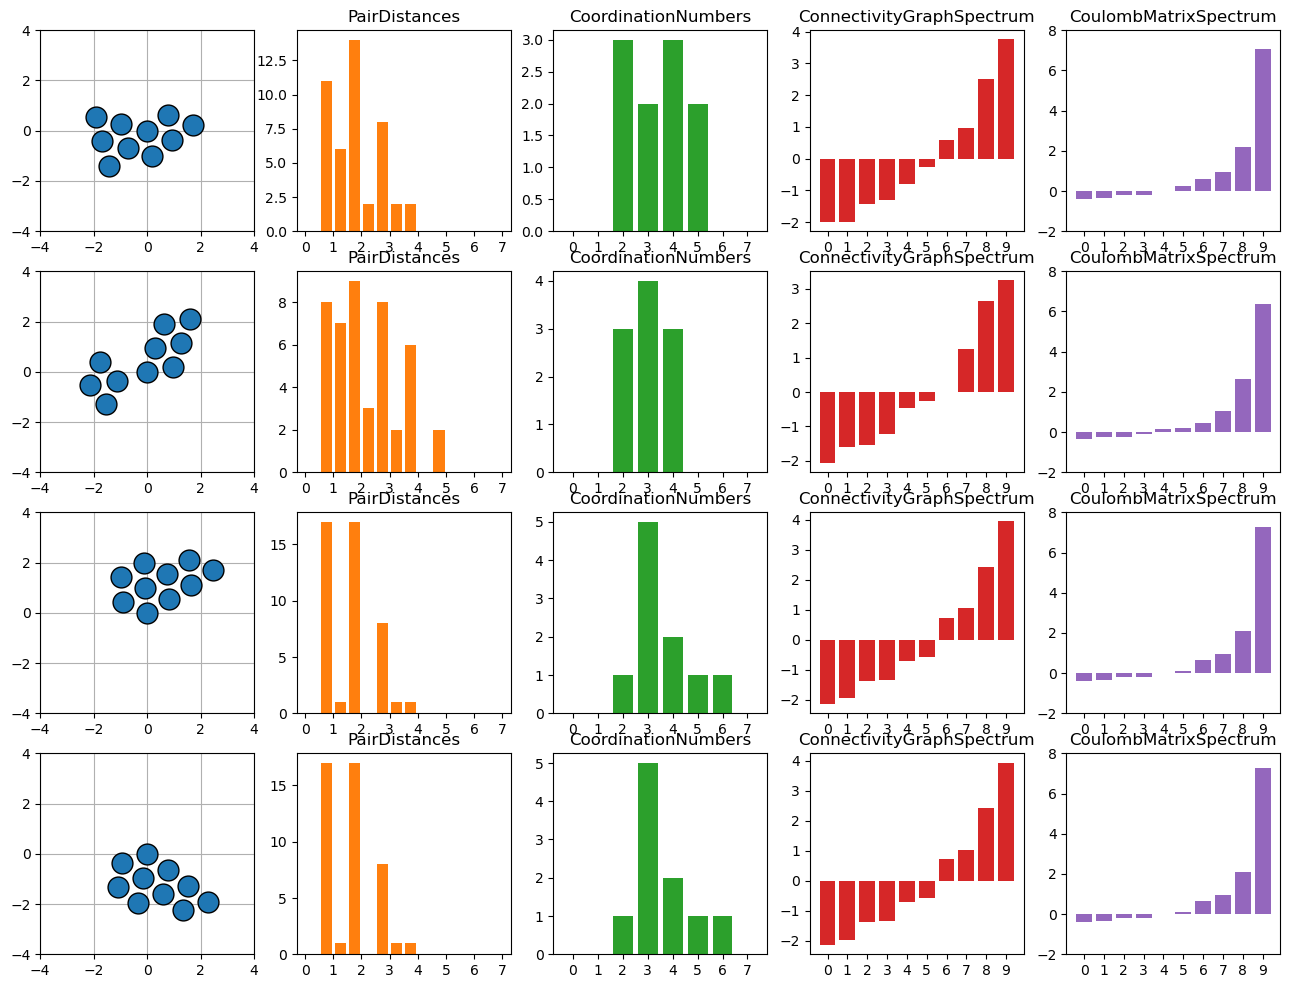

In [7]:
fig, axs = plt.subplots(4, 5, figsize=(16,12))
for atom_col, ax_row in zip(atom_cols, axs):
    atom_col.set_sizes(new_sizes=[15.0 for i in range(10)])
    atom_col.plot(ax=ax_row[0])
    ax_row[0].set_xlim([-4,4])
    ax_row[0].set_ylim([-4,4])
    ax_row[0].grid()
    for descriptor_type, ax in zip(descriptor_types, ax_row[1::]):
        descriptor_type.plot(atom_col=atom_col, ax=ax)
    atom_col.reset_plot_axes()

In [3]:
atom_col = atom_cols[3]
con_graph = descriptor_types[0]

In [4]:
con_graph.get_descriptor(atom_col)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]


array([ 0, 17,  1, 17,  0,  8,  1,  1,  0,  0,  0,  0,  0,  0],
      dtype=int64)